<a href="https://colab.research.google.com/github/Pieriii/practica.random/blob/main/Educacion_random.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# prompt: armar un dataframe de al menos 100 filas con datos random con apellido y nombre, nro_dni, materias de educacion nivel secundario de la argentina que contenga las siguientes columnas: materia escolar, nota 1er Trimestre, nota 2do Trimestre, nota 3er Trimestre, Faltas a clases.

import pandas as pd
import numpy as np
import random

# Define materias
materias = ["Matemática", "Lengua y Literatura", "Historia", "Geografía", "Ciencias Naturales", "Educación Física", "Inglés", "Artes", "Música", "Tecnología", "Formación Ética y Ciudadana"]

# Generar datos aleatorios
num_filas = 100
apellidos = ["Gonzalez", "Rodriguez", "Perez", "Gomez", "Lopez", "Martinez", "Sanchez", "Ramirez", "Flores", "Torres"]
nombres = ["Juan", "Maria", "Jose", "Ana", "Pedro", "Laura", "Carlos", "Sofia", "Luis", "Gabriela"]
dni = [random.randint(10000000, 99999999) for _ in range(num_filas)]
data = []

for _ in range(num_filas):
  for materia in materias:
    data.append({
        "Apellido": random.choice(apellidos),
        "Nombre": random.choice(nombres),
        "nro_dni": random.choice(dni),
        "materia escolar": materia,
        "nota 1er Trimestre": random.randint(1,10),
        "nota 2do Trimestre": random.randint(1,10),
        "nota 3er Trimestre": random.randint(1,10),
        "Faltas a clases": random.randint(0, 15)
    })

# Crear DataFrame
df = pd.DataFrame(data)

# Imprimir el DataFrame
df

,Apellido,Nombre,nro_dni,materia escolar,nota 1er Trimestre,nota 2do Trimestre,nota 3er Trimestre,Faltas a clases
0,Perez,Ana,37423432,Matemática,7,4,7,7
1,Sanchez,Maria,25859632,Lengua y Literatura,9,9,5,1
2,Perez,Carlos,47464113,Historia,10,9,7,7
3,Gomez,Carlos,20594073,Geografía,6,6,1,1
4,Perez,Ana,50358832,Ciencias Naturales,2,9,4,11
...,...,...,...,...,...,...,...,...
1095,Martinez,Jose,35003082,Inglés,6,4,6,2
1096,Perez,Carlos,23900324,Artes,10,7,4,5
1097,Flores,Juan,54554853,Música,1,2,5,9
1098,Torres,Laura,31758773,Tecnología,7,1,1,7


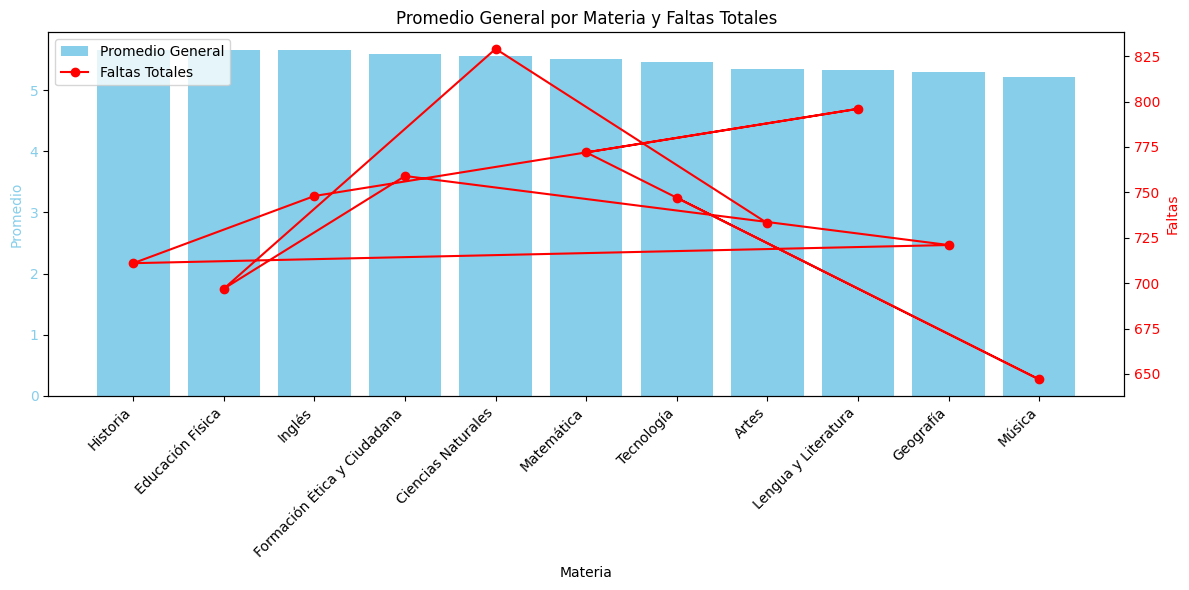

In [3]:
# prompt: Armar grafico de barras con Promedio general de cada materia, ordenados de mayor a menor, agregar las faltas como valor constrastable en dos ejes. Agregar las leyendas que ayuden a la interpretación.

import pandas as pd
import matplotlib.pyplot as plt

# Calculate the average grade for each subject
average_grades = df.groupby("materia escolar")[["nota 1er Trimestre", "nota 2do Trimestre", "nota 3er Trimestre"]].mean().mean(axis=1)
average_grades = average_grades.sort_values(ascending=False)

# Calculate the total absences for each subject
total_absences = df.groupby("materia escolar")["Faltas a clases"].sum()

# Create the bar plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot average grades
ax1.bar(average_grades.index, average_grades.values, color="skyblue", label="Promedio General")
ax1.set_xlabel("Materia")
ax1.set_ylabel("Promedio", color="skyblue")
ax1.tick_params(axis="y", labelcolor="skyblue")
ax1.set_title("Promedio General por Materia y Faltas Totales")
plt.xticks(rotation=45, ha="right")

# Create a second y-axis for absences
ax2 = ax1.twinx()
ax2.plot(total_absences.index, total_absences.values, marker="o", color="red", label="Faltas Totales")
ax2.set_ylabel("Faltas", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Add legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")

# Show the plot
plt.tight_layout()
plt.show()

In [5]:
df.to_csv("datos_alumnos.csv", index=False)